### Prep Works

In [1]:
# import packages
import pandas as pd
import numpy as np
from datetime import datetime

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load P3 dataset
info = pd.read_csv('../data/Athlete Information_Master.csv', encoding='ISO-8859-1')
vertical = pd.read_csv('../data/Athlete_Vertical_Template_Master.csv', encoding='ISO-8859-1')
r_skater = pd.read_csv('../data/Athlete Right Skater Template_Master.csv', encoding='ISO-8859-1')
l_skater = pd.read_csv('../data/Athlete Left Skater Template_Master.csv', encoding='ISO-8859-1')
drop = pd.read_csv('../data/Athlete Drop Jump Template_Master.csv', encoding='ISO-8859-1')

# Taran Armstrong
ta_info = pd.read_csv('../data/Taran Armstrong Athlete Info.csv', encoding='ISO-8859-1')
ta_vertical = pd.read_csv('../data/2024040809291752_008_1_Taran Armstrong_CMJ.csv', encoding='ISO-8859-1')
ta_rs = pd.read_csv('../data/2024040809261889_006_1_Taran Armstrong_Right Lateral CMJ.csv', encoding='ISO-8859-1')
ta_ls = pd.read_csv('../data/2024040809252654_003_1_Taran Armstrong_Left Lateral CMJ.csv', encoding='ISO-8859-1')
ta_drop = pd.read_csv('../data/2024040809305484_010_1_Taran Armstrong_Drop Jump.csv', encoding='ISO-8859-1')

# Devin Carter
dc_info = pd.read_csv('../data/Devin Carter Athlete Info.csv', encoding='ISO-8859-1')
dc_vertical = pd.read_csv('../data/vertical_Devin_Carter_2024-04-08.csv', encoding='ISO-8859-1')
dc_rs = pd.read_csv('../data/right_skater_Devin_Carter_2024-04-08.csv', encoding='ISO-8859-1')
dc_ls = pd.read_csv('../data/left_skater_Devin_Carter_2024-04-08.csv', encoding='ISO-8859-1')
dc_drop = pd.read_csv('../data/drop_jump_Devin_Carter_2024-04-08.csv', encoding='ISO-8859-1')

# Injury Data
transaction = pd.read_csv('../data/injury_raw.csv')

In [3]:
# get NBA names

# pip install nba_api
from nba_api.stats.static import players

# getting all players
all_players = players.get_players()
nba_names = [player['full_name'] for player in all_players]

# manually adding names
nba_names += ['EJ Liddell','Taran Armstrong','Devin Carter','Kevin McCullar']

##### Injury: Add Manually Found Data from P3 File to Scraped Injury Dataset

In [4]:
transaction.loc[len(transaction.index)] = ['2024-04-08', '', '', 'Taran Armstrong', 'back issue']
transaction.loc[len(transaction.index)] = ['2024-04-08', '', '', 'Devin Carter', 'back issue']
transaction.loc[len(transaction.index)] = ['2023-07-27', '', '', 'Alperen Sengun', 'back issue']
transaction.loc[len(transaction.index)] = ['2023-07-28', '', '', 'EJ Liddell', 'back issue']
transaction.loc[len(transaction.index)] = ['2023-05-15', '', '', 'Kevin McCullar', 'back issue']

#### Include Taran Armstrong and Devin Carter & Feature Selection

##### Info

In [5]:
# concat
c_info = pd.concat([info, ta_info, dc_info])

# filter out non-nba info
nba_info = c_info[c_info['Name'].isin(nba_names)]

# remove time to columns
nba_info = nba_info.loc[:, ~nba_info.columns.str.contains('time to', case = False)]

# drop columns that are majority blank
nba_info = nba_info.dropna(thresh = len(nba_info) * 0.53, axis=1)

# convert new columns
nba_info['Body Weight Force'] = (nba_info['Body Weight Force Left'] + nba_info['Body Weight Force Right']) / nba_info['Body Weight (kg)']
nba_info['Free Fall Force'] = (nba_info['Free Fall Force Left'] + nba_info['Free Fall Force Right']) / nba_info['Body Weight (kg)']
nba_info['Peak Loading Force'] = (nba_info['Peak Loading Force Left'] + nba_info['Peak Loading Force Right']) / nba_info['Body Weight (kg)']
nba_info['Peak Concentric Force'] = (nba_info['Peak Concentric Force Left'] + nba_info['Peak Concentric Force Right']) / nba_info['Body Weight (kg)']
nba_info['Imp1 RAW'] = (nba_info['Imp1 - L RAW'] + nba_info['Imp1 - R RAW']) / 2
nba_info['Imp2 RAW'] = (nba_info['Imp2 - L RAW'] + nba_info['Imp2 - R RAW']) / 2
nba_info['Conc RAW'] = (nba_info['Conc - L RAW'] + nba_info['Conc - R RAW']) / 2
nba_info['Inversion'] = (nba_info['Inversion L'] + nba_info['Inversion R']) / 2
nba_info['Eversion'] = (nba_info['Eversion L'] + nba_info['Eversion R']) / 2
nba_info['Translation'] = (nba_info['Translation L'] + nba_info['Translation R']) / 2
nba_info['Trans.Velo'] = (nba_info['Trans.Velo. L'] + nba_info['Trans. Velo. R']) / 2

# delete left/right columns
nba_info = nba_info.loc[:, ~nba_info.columns.str.contains('Left|Right| L$| R$| L | R ', regex = True)]

##### Vertical

In [6]:
# concat
c_vertical = pd.concat([vertical, dc_vertical, ta_vertical])

# filter out non-nba info
nba_vertical = c_vertical[c_vertical['Name'].isin(nba_names)]

# keep selective cols
v_vars = ['Name', 'assessmentDate','totalMovementTimeRight','totalMovementTimeLeft','maxAnkleDorsiflexionAvg',
         'maxKneeFlexionAvg', 'maxKneeExtensionVelocityAvg','maxHipFlexionAvg','deltaHipFlexionMaxFreeFallAvg',
         'maxHipExtensionAvg','maxHipExtensionVelocityAvg']

nba_vertical = nba_vertical.loc[:, v_vars]

# convert new columns and drop L/R
nba_vertical['totalMovementTime'] = (nba_vertical['totalMovementTimeRight'] + nba_vertical['totalMovementTimeLeft'])/2
nba_vertical = nba_vertical.drop(columns = ['totalMovementTimeRight','totalMovementTimeLeft'])

# abs metric
nba_vertical[nba_vertical.columns.difference(['assessmentDate','Name'])] = nba_vertical[nba_vertical.columns.difference(['assessmentDate','Name'])].apply(abs)

##### Drop

In [7]:
# concat
c_drop = pd.concat([drop, dc_drop, ta_drop])

# filter out non-nba info
nba_drop = c_drop[c_drop['Name'].isin(nba_names)]

# keep selective cols
drop_vars = pd.read_csv('../data/Drop_Vars.csv', encoding='ISO-8859-1').columns.to_list()
nba_drop = nba_drop.loc[:, drop_vars]

# convert new columns and drop L/R
nba_drop['totalMovementTime'] = (nba_drop['totalMovementTimeRight'] + nba_drop['totalMovementTimeLeft'])/2
rotation_cols = nba_drop.loc[:, nba_drop.columns.str.contains('Rotation')].columns.to_list()
nba_drop['RotationAverage'] = nba_drop[rotation_cols].mean(axis=1)

# abs metric
neg_vars = ['ankleTotalROMAvg','totalMovementImpulsePercentDifference','ankleActiveDecelerationAvg',
'kneeFlexionAtT0Avg','maxKneeFlexionRight','maxKneeFlexionLeft','maxKneeFlexionAvg',
'deltaKneeFlexionAvg','maxKneeFlexionVelocityAvg','maxKneeFlexionAccelerationAvg',
'hipTotalROMAvg','maxHipExtensionVelocityAvg','maxHipActiveDecelerationAvg',
'maxHipExtensionAccelerationAvg']
nba_drop[neg_vars] = nba_drop[neg_vars].apply(abs)

# Max (Ankle, Knee and Hip) Flexion Assym
nba_drop['MaxAnkleFlexionAssym'] = abs(nba_drop['maxAnkleDorsiflexionLeft'] - nba_drop['maxAnkleDorsiflexionRight'])
nba_drop['MaxKneeFlexionAssym'] = abs(nba_drop['maxKneeFlexionLeft'] - nba_drop['maxKneeFlexionRight'])
nba_drop['MaxHipFlexionAssym'] = abs(nba_drop['maxHipFlexionLeft'] - nba_drop['maxHipFlexionRight'])

# drop L/R
nba_drop = nba_drop.drop(columns = ['totalMovementTimeRight','totalMovementTimeLeft', 'maxAnkleDorsiflexionLeft',
                                   'maxAnkleDorsiflexionRight','maxKneeFlexionLeft','maxKneeFlexionRight',
                                   'maxHipFlexionLeft', 'maxHipFlexionRight'] + rotation_cols)

##### LR Skater

In [8]:
# concat
c_lskater = pd.concat([l_skater, dc_ls, ta_ls])
c_rskater = pd.concat([r_skater, dc_rs, ta_rs])

# filter out non-nba info
nba_c_lskater = c_lskater[c_lskater['Name'].isin(nba_names)]
nba_c_rskater = c_rskater[c_rskater['Name'].isin(nba_names)]

# keep selective cols
skater_vars = pd.read_csv('../data/LRSK_Vars.csv', encoding='ISO-8859-1').columns.to_list()
nba_c_lskater = nba_c_lskater.loc[:, skater_vars]
nba_c_rskater = nba_c_rskater.loc[:, skater_vars]

# merge into one
nba_skater = pd.merge(nba_c_lskater, nba_c_rskater, on=['Name', 'assessmentDate'], how='inner')

# convert metric
skater_vars = nba_skater.iloc[:,2:].columns.to_list()
nba_skater['maxLateralForce'] = (nba_skater['maxLateralForce_x'] + nba_skater['maxLateralForce_y'])/2
nba_skater['maxKneeExtensionVelocity'] = (nba_skater['maxKneeExtensionVelocity_x'] + nba_skater['maxKneeExtensionVelocity_y'])/2
nba_skater['maxHipFlexion'] = (nba_skater['maxHipFlexion_x'] + nba_skater['maxHipFlexion_y'])/2
nba_skater['maxHipExtensionVelocity'] = (nba_skater['maxHipExtensionVelocity_x'] + nba_skater['maxHipExtensionVelocity_y'])/2
nba_skater['maxHipAbduction'] = (nba_skater['maxHipAbduction_x'] + nba_skater['maxHipAbduction_y'])/2
nba_skater['maxHipAbductionVelocity'] = (nba_skater['maxHipAbductionVelocity_x'] + nba_skater['maxHipAbductionVelocity_y'])/2

# drop L/R
nba_skater = nba_skater.drop(columns = skater_vars)

# abs metric
nba_skater[nba_skater.columns.difference(['assessmentDate','Name'])] = nba_skater[nba_skater.columns.difference(['assessmentDate','Name'])].apply(abs)

#### Merge All P3 Datasets on NBA Players

In [9]:
from functools import reduce

dataframes = [nba_info, nba_vertical, nba_skater, nba_drop]
p3 = reduce(lambda left, right: pd.merge(left, right, on=['Name', 'assessmentDate'], how='inner'), dataframes)

p3.shape

(672, 69)

###### Skater: Divide Lateral Force by mass in kg

In [11]:
p3['maxLateralForce/kg'] = p3['maxLateralForce'] / p3['Body Weight (kg)']
p3_nba = p3.drop(columns = ['maxLateralForce'])

### Data Cleaning

#### 1. Filter injury data on players assessed by P3

In [12]:
p3_transaction = transaction[transaction['Relinquished'].isin(p3_nba.Name.unique().tolist())]

#### 2. Filter out data on 'recovering', 'rest', 'returned' and 'surgery'

In [13]:
irrelevant1 = r'recovering|rest|surgery|returned'
p3_transaction = p3_transaction[~p3_transaction.Notes.str.contains(irrelevant1, 
                                                                   regex=True, 
                                                                   case=False)]

#### 3. Filter out injury data on non-interested body parts

In [14]:
irrelevant2 = r'\b(ill|illness|flu|shoulder|finger|abdominal|forearm|rib|ribs|gastroenteritis|head|pelvic|reaction|food|orbital|spine|mononucleosis|gasroenteritis|neck|COVID-19|lat|arm|oblique|protocols|collarbone|appendicitis|nausea|health|conditioning|various|breath|headache|forehead|blood|thoracic|rotator cuff|general|core|cervical|personal|throat|concussion|wrist|appendectomy|elbow|tailbone|hand|viral|thumb|facial|jaw|pubis|virus|hernia|cold|respiratory|eye|mouth|dental|chest|nerve|unspecified|nose|abdomen|fine|pectoral|bicep|fined|undisclosed|lung)\b'

p3_transaction_lower = p3_transaction[~p3_transaction.Notes.str.contains(irrelevant2, 
                                                                         regex=True, 
                                                                         case=False)]

irrelevant3 = [' DNP', ' inflammation (DNP)', ' DNP (out for season)', ' DTD']
p3_transaction_lower = p3_transaction_lower[~(p3_transaction_lower['Notes'].isin(irrelevant3))]

# drop columns: Team and Acquired
p3_transaction_lower = p3_transaction_lower.drop(columns = ['Team', 'Acquired'])
p3_transaction_lower.shape

/var/folders/g5/329m32hd5210n5yybqk5znnr0000gn/T/ipykernel_87830/3285160514.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  p3_transaction_lower = p3_transaction[~p3_transaction.Notes.str.contains(irrelevant2,


(1403, 3)

#### 4. Filter out Injury Data before 2015

In [15]:
p3_transaction_lower = p3_transaction_lower[p3_transaction_lower['Date'] >= '2015-01-01']

#### 5. Filter out Non-Serious Sore/Stiff/Tight

**Logic**: Only keep the data on sore/stiff/tight if it continues for a week
- NBA teams usually play 3 games a week, a soreness/stiffness/tightness is considered seriours if a player is listed out in 3 consecutive games for the same reason)

In [16]:
# convert Date column to comparable format
p3_transaction_lower['Date'] = pd.to_datetime(p3_transaction_lower['Date'], format='%Y-%m-%d')

# define real soreness identifier function
def real_sore_identifier(row):
    if any(keyword in row['Notes'] for keyword in ['stiff','tight','sore','tightness','stiffness','soreness']):
        start_date = row['Date']
        end_date = row['Date'] + pd.Timedelta(days=7)
        same_injury = p3_transaction_lower[
            (p3_transaction_lower['Relinquished'] == row['Relinquished']) &
            (p3_transaction_lower['Date'] >= start_date) & 
            (p3_transaction_lower['Date'] <= end_date) & 
            (p3_transaction_lower['Notes'] == row['Notes'])
        ]
        if len(same_injury) < 3:
            p3_transaction_lower.drop(p3_transaction_lower[
                (p3_transaction_lower.Date == row['Date'] ) &
                (p3_transaction_lower.Relinquished == row['Relinquished']) &
                (p3_transaction_lower.Notes == row['Notes'])].index, inplace = True)

# apply the function
p3_transaction_lower.apply(lambda row: real_sore_identifier(row), axis=1) # 

22630    None
22631    None
22645    None
22724    None
22726    None
         ... 
30935    None
30936    None
30937    None
30938    None
30939    None
Length: 899, dtype: object

#### 7. Brief Summary on Data Size

,0
Ankle,171
Knee,116
Back,56
Hamstring,42
Hip,35
Foot,35
Toe,28
Calf,27
Quadriceps,24
Achilles,18


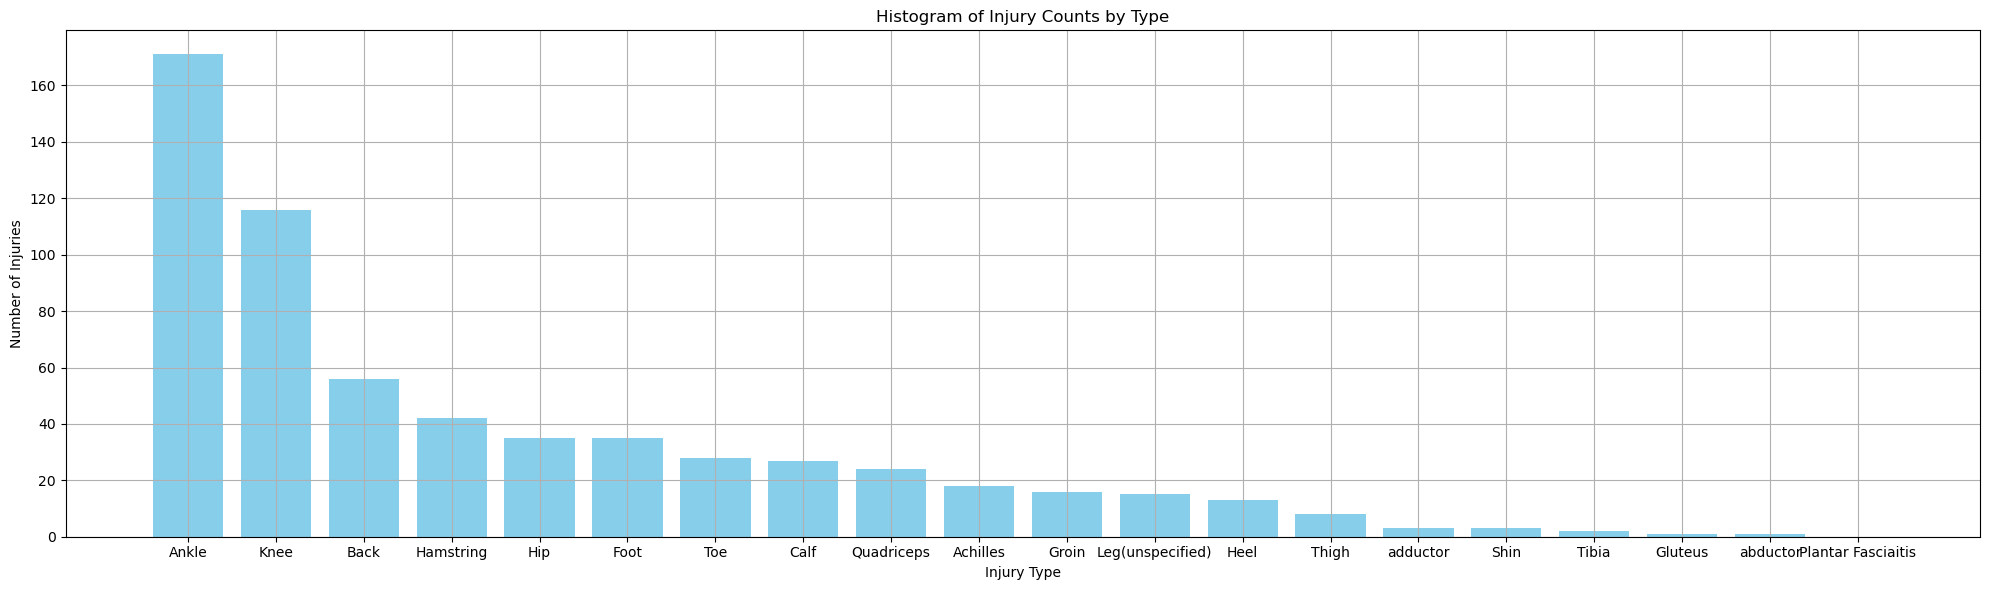

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = p3_transaction_lower

# Filtering data based on keywords in the 'Notes' column
injury_categories = {
    'Ankle': raw_data[raw_data['Notes'].str.contains('ankle', case=False, na=False)],
    'Knee': raw_data[raw_data['Notes'].str.contains('knee', case=False, na=False)],
    'Back': raw_data[raw_data['Notes'].str.contains('lower back|lumbar|back', case=False, regex=True)],
    'Achilles': raw_data[raw_data['Notes'].str.contains('Achilles', case=False, na=False)],
    'Hip': raw_data[raw_data['Notes'].str.contains('hip', case=False, na=False)],
    'Quadriceps': raw_data[raw_data['Notes'].str.contains('quad', case=False, na=False)],
    'Hamstring': raw_data[raw_data['Notes'].str.contains('hamstring', case=False, na=False)],
    'Calf': raw_data[raw_data['Notes'].str.contains('calf', case=False, na=False)],
    'Foot': raw_data[raw_data['Notes'].str.contains('foot', case=False, na=False)],
    'Plantar Fasciaitis': raw_data[raw_data['Notes'].str.contains('fasciaitis', case=False, na=False)],
    'Groin': raw_data[raw_data['Notes'].str.contains('groin', case=False, na=False)],
    'Thigh': raw_data[raw_data['Notes'].str.contains('Thigh', case=False, na=False)],
    'Toe': raw_data[raw_data['Notes'].str.contains('toe', case=False, na=False)],
    'Heel': raw_data[raw_data['Notes'].str.contains('heel', case=False, na=False)],
    'Tibia': raw_data[raw_data['Notes'].str.contains('tibia', case=False, na=False)],
    'Leg(unspecified)': raw_data[raw_data['Notes'].str.contains('leg', case=False, na=False)],
    'Gluteus': raw_data[raw_data['Notes'].str.contains('gluteus', case=False, na=False)],
    'adductor': raw_data[raw_data['Notes'].str.contains('adductor', case=False, na=False)],
    'abductor': raw_data[raw_data['Notes'].str.contains('abductor', case=False, na=False)],
    'Shin': raw_data[raw_data['Notes'].str.contains('shin', case=False, na=False)],
}

# Count of each category for histogram
injury_counts = {category: len(data) for category, data in injury_categories.items()}
injury_counts = dict(sorted(injury_counts.items(), key=lambda item: item[1], reverse = True))

# Plotting the histogram
plt.figure(figsize=(20, 6))
plt.bar(injury_counts.keys(), injury_counts.values(), color='skyblue')
plt.title('Histogram of Injury Counts by Type')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.tight_layout()
display(pd.DataFrame.from_dict(injury_counts, orient='index'))

#### 6. Clean Merged P3 Data: If multiple assessment data per year, keep the one that is closest to season tipoff

In [21]:
# convert assessmentDate to datetime object
p3_nba['assessmentDate'] = pd.to_datetime(p3_nba['assessmentDate'], format='%m/%d/%Y')

# Group by 'Name' and 'Year' and then transform to get the row with date closest to October 24(season tipoff) of that year
p3_nba['Year'] = p3_nba['assessmentDate'].dt.year
p3_nba['DateDiff'] = np.minimum(
    (p3_nba['assessmentDate'] - pd.to_datetime(p3_nba['Year'].astype(str) + '-10-24')).abs(),
    (p3_nba['assessmentDate'] - pd.to_datetime((p3_nba['Year'] - 1).astype(str) + '-10-24')).abs())

p3_nba_sorted = p3_nba.sort_values(['Name', 'Year', 'DateDiff'], ascending=[True, True, True])

# keep the assessment data that is closest to the season tipoff
p3 = p3_nba_sorted.drop_duplicates(subset=['Name', 'Year'], keep='first')

# Drop the Year and DateDiff columns
p3 = p3.drop(columns=['Year', 'DateDiff'])

#### 7. Combine Datasets: Scraped Injury Data and P3 data

#### Logic

1. Label Injury
    -  For each player season: Label as injured if there is an injury within 2 years following an assessment

2. Past Injuries
    - Record the number of injury before assessment date for each athlete
    - The new features are:
        - Injured: the class label
        - BackHamHistory: The number of Back and Hamstring injury before assessmentDate
        - KneeHistory: The number of Knee injury before assessmentDate
        - LowerLegHistory: The number of Calf, Achilles, and Ankle injury before assessmentDate
        - UpperLegHistory: The number of Hip, Quadriceps, Adductor, and Groin injury before assessmentDate

#### Back and Hamstring

In [22]:
# define function to count the number of back/hamstring injury within 2 years following an assessment
def count_back_hamstring(row):
    start_date = row['assessmentDate']
    end_date = row['assessmentDate'] + pd.Timedelta(days=365*2)
    relevant_injuries = p3_transaction_lower[
        (p3_transaction_lower['Relinquished'] == row['Name']) &
        (p3_transaction_lower['Date'] >= start_date) & 
        (p3_transaction_lower['Date'] <= end_date) & 
        (p3_transaction_lower['Notes'].str.contains(r'back|hamstring',
                                                   case = False))]
    return len(relevant_injuries)

# apply function
p3['BackHamstringprep'] = p3.apply(lambda row: count_back_hamstring(row), axis=1)

# label as injured if there is back/hamstring injury within 2 years following an assessment
p3['Injured'] = p3['BackHamstringprep'].apply(lambda x: 1 if x > 0 else 0)
p3 = p3.drop(columns = ['BackHamstringprep'])

# count injured rows
len(p3[p3.Injured > 0])

35

#### Injury History to Features

In [23]:
# define function to count the number of past injuries
def back_hamstring_history(row):
    start_date = row['assessmentDate']
    relevant_injuries = p3_transaction_lower[
        (p3_transaction_lower['Relinquished'] == row['Name']) &
        (p3_transaction_lower['Date'] <= start_date) & 
        (p3_transaction_lower['Notes'].str.contains(r'back|hamstring',
                                                   case = False))]
    return len(relevant_injuries)

def knee_history(row):
    start_date = row['assessmentDate']
    relevant_injuries = p3_transaction_lower[
        (p3_transaction_lower['Relinquished'] == row['Name']) &
        (p3_transaction_lower['Date'] <= start_date) & 
        (p3_transaction_lower['Notes'].str.contains(r'knee',
                                                   case = False))]
    return len(relevant_injuries)

def lower_leg_history(row):
    start_date = row['assessmentDate']
    relevant_injuries = p3_transaction_lower[
        (p3_transaction_lower['Relinquished'] == row['Name']) &
        (p3_transaction_lower['Date'] <= start_date) & 
        (p3_transaction_lower['Notes'].str.contains(r'calf|achilles|ankle',
                                                   case = False))]
    return len(relevant_injuries)

def upper_leg_history(row):
    start_date = row['assessmentDate']
    relevant_injuries = p3_transaction_lower[
        (p3_transaction_lower['Relinquished'] == row['Name']) &
        (p3_transaction_lower['Date'] <= start_date) & 
        (p3_transaction_lower['Notes'].str.contains(r'hip|quadriceps|adductor|groin',
                                                   case = False))]
    return len(relevant_injuries)


# apply function
p3['BackHamHistory'] = p3.apply(lambda row: back_hamstring_history(row), axis=1)
p3['KneeHistory'] = p3.apply(lambda row: knee_history(row), axis=1)
p3['LowerLegHistory'] = p3.apply(lambda row: lower_leg_history(row), axis=1)
p3['UpperLegHistory'] = p3.apply(lambda row: upper_leg_history(row), axis=1)

#### Filter out Assessment After 2022 May and Before 2015 if Healthy

In [24]:
p3 = p3[((p3.Injured == 0) & (p3.assessmentDate < pd.to_datetime('2022-05-01')) & (p3.assessmentDate > pd.to_datetime('2015-01-01')))
        | (p3.Injured == 1)]

In [71]:
p3.to_csv('../data/clean_data.csv')

#### Check Missing Values

In [28]:
missing_columns = p3.columns[p3.isnull().any()]

missing_data = {}

for column in missing_columns:
    # Store rows where the specific column is missing
    missing_data[column] = p3[p3[column].isnull()].loc[:,['Name', 'assessmentDate', column]]
    
missing_data

{'Level':               Name assessmentDate Level
 203  Jose Alvarado     2018-09-23   NaN
 393  Jose Alvarado     2020-09-11   NaN
 202   Moses Wright     2018-09-17   NaN
 388   Moses Wright     2020-08-05   NaN
 467   Zhaire Smith     2022-02-10   NaN,
 'Height':                     Name assessmentDate  Height
 39          Aaron Gordon     2015-04-28     NaN
 18            Alec Burks     2015-08-31     NaN
 34        Andre Drummond     2015-08-04     NaN
 32           Baron Davis     2015-04-20     NaN
 31        Brandon Davies     2015-06-08     NaN
 52        Brandon Ingram     2015-07-24     NaN
 42           Danny Green     2015-08-18     NaN
 246       Derrick Favors     2015-06-01     NaN
 36          Festus Ezeli     2015-07-23     NaN
 98          Festus Ezeli     2016-07-01     NaN
 57        Frank Kaminsky     2015-06-08     NaN
 33   Matthew Dellavedova     2015-07-15     NaN
 99       Perry Jones III     2016-05-30     NaN
 47           Rodney Hood     2015-09-01     NaN

#### Missing values in the clean_data dataset filled by P3 Master Database
1. Filled NaN dataset stored as 'UCSB_Capstone_cleaned_data.csv'
2. New Dataset:
- Shape: 361*74
- Injured: 32
- Time Frame: 
    - Injured: 2015-2024
    - Healthy: 2015-2022
- Variable Changes:
    - Deleted 'bodyweight force' because same as 'bodyweight kg'
    - Made the 'RAW' columns relative to bodyweight and renamed them 'Rel's